# A very straightforward notebook
### to bring together a range of useful basic data eng and data sci techniques

Contents:
  - Import statement
  - Cheatsheets
  - Python Basics
  - Basic data structures
  - Data sourcing
  - Numpy
  - Pandas
    - Loading data
    - Plotting with pandas
    - Merge dataframes
    - Join dataframes
    - Concat dataframes
    - EXAMPLE Olympic Sports and Medals
    - Data Cleaning
  - Data Visualisation (v basic, see other visualisation notebook)

  ### For SQL, see separate notebook


### Broad import statement

In [1]:
# data sourcing:
import csv

# databases:
import sqlite3

# data toolkit:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# CHEATSHEETS
[SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

[Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#

# Python Basics

In [4]:
# string methods:
# https://docs.python.org/3.7/tutorial/introduction.html#strings
a_string = "some. thing. thingy"
a_word = "thing"
a_substring = 'ing'
a_string.replace(" ", ", ") # replaces . with a ,
a_word in a_string # returns true if found
a_string.count(a_substring) # returns how many times a_substring occurs in a_string
a_string[-1] == "?" # true if ends with ?
a_string.strip() # removes trailing and preceding whitespace
a_string.capitalize()
first_name = "john"
last_name = "doe"
age = 33
"{} {} is {}".format(first_name.capitalize(), last_name.capitalize(), str(age)) # formatting string
f"string formats string {a_word} and ints {str(age)}"

'string formats string thing and ints 33'

# basic data structures:
- [Lists](https://docs.python.org/3.7/tutorial/introduction.html#lists), called _array_ in other languages
- [More on lists](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists)
- [List Comprehensions](https://docs.python.org/3.7/tutorial/datastructures.html#list-comprehensions)
- [Tuples](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences)
- [Dictionaries](https://docs.python.org/3.7/tutorial/datastructures.html#dictionaries), called _hash_ or _hashmap_ in other languages
- [Looping Techniques](https://docs.python.org/3.7/tutorial/datastructures.html#looping-techniques) with the `for` keyword

In [5]:
## remember, the following are found in the data-challenges-reboot 01-Python/01-Programming-Basics folder:
    # debugging
    # system parameters i.e: sys.argv[1]
    # environment variables, i.e: os.getenv("FLASK_ENV")

## Data Sourcing / Source data
### Found in 01-Python/02-Data-Sourcing

In [6]:
# reading csv files into python (as list):

print("with csv.reader(file): \n")
with open('../data/phone_book.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count != 0: # ie. skip header
            print(', '.join('%s'%x for x in row))
        line_count += 1

with csv.reader(file): 

John, Lennon, 123
George, Harrison, 456
Ringo, Star, 789
Paul, McCartney, 148
Hugh, BrilliantHead, 555


In [7]:
# reading csv files into python (as dict):

print("with csv.dictreader: \n")
with open('../data/phone_book.csv', mode='r') as csv_file:
    dict_reader = csv.DictReader(csv_file)
    for row in dict_reader:
        print(row.values())
        print(", ".join('%s'%x for x in row.values()))

with csv.dictreader: 

dict_values(['John', 'Lennon', '123'])
John, Lennon, 123
dict_values(['George', 'Harrison', '456'])
George, Harrison, 456
dict_values(['Ringo', 'Star', '789'])
Ringo, Star, 789
dict_values(['Paul', 'McCartney', '148'])
Paul, McCartney, 148
dict_values(['Hugh', 'BrilliantHead', '555'])
Hugh, BrilliantHead, 555


# APIs and scraping: see examples in 
[01-Python/02-Data-Sourcing](/home/hughharford/code/hughharford/data-challenges-reboot/02-Data-Toolkit/02-Data-Sourcing)

### NUMPY for arrays, series

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [33]:
import numpy as np

In [34]:
ten_zeros = np.zeros(10)
five_to_ten = np.arange(5,11)
A = np.array([[5,9,7], [1,0,3]])
B = np.ones((2,2), dtype = int)
lin_twenty = np.linspace(-1,1,20)
C = np.identity(3, dtype = int)
D = np.array([2,9,7,3,1,5], dtype = int)
E = np.reshape(D, (2,3))
f = np.identity(2, dtype = int)
F = np.tile(f,(4,4)) # makes 8x8 identity
G = np.random.random((4, 5))
reshaped_G = np.hsplit(G,5)[1] # split into list of arrays, from X columns
H = np.array([0, 4, -4, -3, 1, 1]).reshape(3, 2) # create arrays this way
I = np.array([[0, 1], [1, -1], [2, 3]]) # or this way

In [35]:
# PANDAS as PD

In [36]:
import pandas as pd
import matplotlib

# PANDAS

## LOADING DATA INTO PANDAS

In [2]:
# load data:
file = "../data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
df = gas_df
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


# EDA Exploratory Data Analysis

In [4]:
# Obvious Pandas EDA methods
df.shape
df.info()
df.columns
# df['Wyoming'].value_counts() # USE FOR CATEGORICAL DATA
df['Wyoming'].nunique()
df['Wyoming'].describe()# gives simple stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

count     121.000000
mean     5867.413223
std       816.617410
min      4556.000000
25%      5290.000000
50%      5613.000000
75%      6607.000000
max      7297.000000
Name: Wyoming, dtype: float64

In [5]:
# some wider useful methods:
gas_df.Month = pd.to_datetime(gas_df.Month) # convert to datetime inplace
month_type = gas_df['Month'].dtype # check the datatype of a column
gas_df['Month'].dt.year.head() # access with dt if a datatime datatype
gas_df['Month'].dt.month.tail()

index_zero = gas_df.index[0] # access the index as list
first_entry = gas_df.iloc[0,0] # iloc can access any specific, slice etc

gas_df.columns[1:].sort_values() # see a selection of columns sorted

#renaming columns:
# gas_df.rename(columns={'previous_name':'new_name'}, inplace = True)


Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'U.S.', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

In [6]:
# AGGREGATE Methods

# Groupby can then be chained with many other methods:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [7]:
# Boolean indexing:
filtered_yearly_gas_df = yearly_gas_df[np.logical_and(yearly_gas_df.index > 2008, yearly_gas_df.index < 2018)]

In [9]:
# filtering 

other_df = yearly_gas_df.loc[yearly_gas_df.index > 2008]
other_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296


In [ ]:
# filtering by columns
yearly_gas_df.filter(items=['U.S.'])
# or simply:
yearly_gas_df['U.S.']
yearly_gas_df.Alaska

yearly_gas_df[['U.S.'],['Alaska']]


In [ ]:
# plot all the numerical features in histograms:
# Plot distribution for the numerical features  available in the dataset
for variable in gas_df.select_dtypes(exclude = ["object"]).columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(gas_df[variable])
    plt.show()


## PLOTTING WITH PANDAS

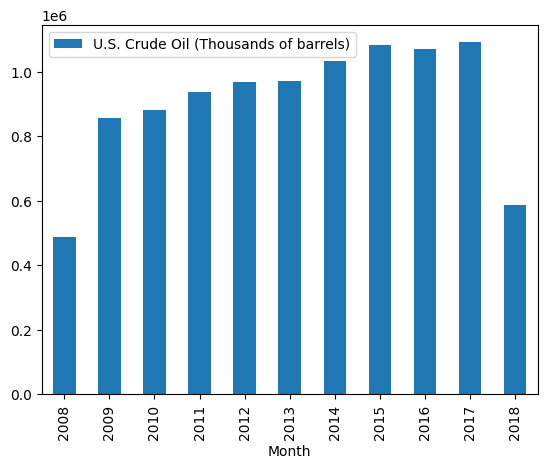

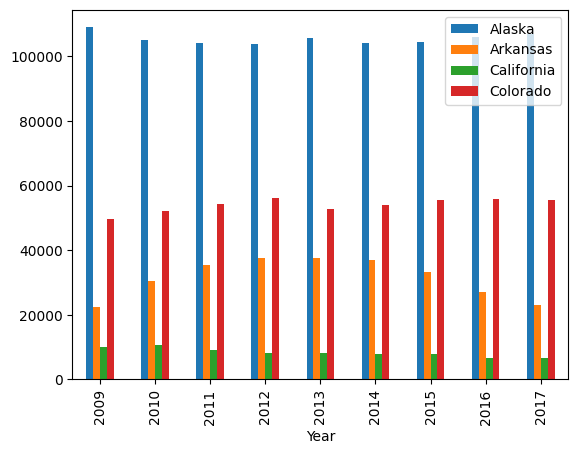

In [43]:
# firstly, quick plots using pandas:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
# or
plot.legend(['U.S. Crude Oil (Thousands of barrels)']);
plot = filtered_yearly_gas_df.filter(items=['Alaska', 'Arkansas', 'California', 'Colorado']).plot(kind="bar")
plot.set_xlabel("Year");

In [44]:
# load another df:
oil_df = pd.read_csv('../data/U.S._crude_oil_production.csv')
oil_df.Month = pd.to_datetime(oil_df.Month)
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum()
yearly_oil_df.rename(columns={'U.S. Crude Oil ':'U.S. Crude Oil'}, inplace = True)
filtered_yearly_oil_df = yearly_oil_df[np.logical_and(yearly_oil_df.index > 2008, yearly_oil_df.index < 2018)]

In [45]:
total_gas = filtered_yearly_gas_df.filter(['U.S.'])
total_oil = filtered_yearly_oil_df.filter(['U.S. Crude Oil'])

In [46]:
total_gas.rename(columns={'U.S.':'Gas'}, inplace = True)
total_oil.rename(columns={'U.S. Crude Oil':'Crude Oil'}, inplace = True)

# MERGE DATAFRAMES
### Merge when matching 2 columns

In [47]:
merged_df = pd.concat((total_gas, total_oil), axis=1)
merged_df

,Gas,Crude Oil
Month,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970
2017,1090730,112205


In [48]:
# simple dfs for merging:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [49]:

b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [50]:
# inner merge, results in DF with no nulls:
inner_merged_df = a_df.merge(b_df, how="inner", on=['Country'])
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


In [51]:
# left merge: takes all from first DF
left_merged_df =  a_df.merge(b_df, how="left", on=['Country'])
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [52]:
# right merge: predictably takes all from input DF:
right_merged_df = a_df.merge(b_df, how="right", on=['Country'])
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [53]:
# outer merge: includes all:
outer_merged_df = a_df.merge(b_df, how="outer", on=['Country'])
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


# JOIN DATAFRAMES
### To join on the index

In [54]:
# set indexes:
aa_df = a_df.set_index("Country")
bb_df = b_df.set_index("Country")


In [55]:
a_df.join(bb_df) # default is left join

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN


In [56]:
aa_df.join(bb_df, how='inner')
aa_df.join(bb_df, how='right')
aa_df.join(bb_df, how='outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [57]:
# Concatenation with concat:
# I.e. just add one set onto the other, including Null where there isn't data
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


# EXAMPLE
## Olympic Sports and Medals, 1896-2014

In [58]:
countries_df = pd.read_csv('../data/dictionary.csv') # load data
summer_df = pd.read_csv('../data/summer.csv')
winter_df = pd.read_csv('../data/winter.csv')
summer_df.rename(columns={'Country':'Code'}, inplace=True) # rename columns
winter_df.rename(columns={'Country':'Code'}, inplace=True)
summer_countries_df = summer_df.merge(countries_df, how='left', on=['Code']) # merge on code into summer_df as left
summer_countries_df['Season'] = 'Summer' # fill new column with string
winter_countries_df = winter_df.merge(countries_df, how='left', on=['Code']) # merge on code into winter_df as left
winter_countries_df['Season'] = 'Winter'
all_df = pd.concat((winter_countries_df, summer_countries_df)) # concatenate matching columned df
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Switzerland,8286976.0,80945.079219,Winter


## Data Cleaning

In [59]:
all_df['Country'].isna().sum()

6367

In [60]:
all_df.dropna(subset=['Country'], inplace=True)

In [61]:
all_df['Country'].isna().sum()

0

### Top Countries Analysis - since 1984

In [63]:
all_df.drop_duplicates(keep=False,inplace=True) 
all_df = all_df[all_df['Year'] >= 1984] # filter
top_10_df = all_df.groupby(['Code'])['Medal'].count().sort_values(ascending=False)[:10]
top_10_df = pd.DataFrame(top_10_df)
top_10_df.rename(columns={'Medal':'Medal Count'}, inplace=True);
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, USA to NED
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Medal Count  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


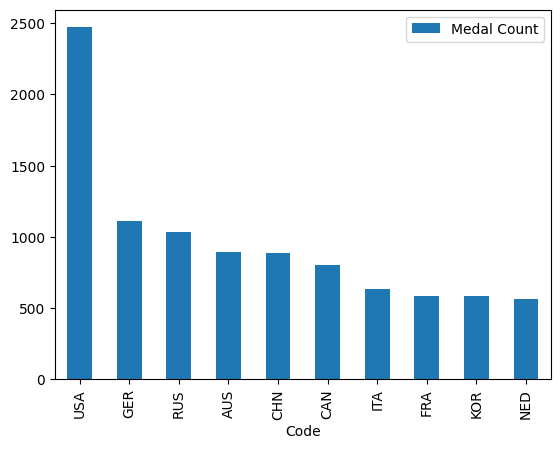

In [64]:
top_10_df.plot(kind="bar");

---

### Top 10 Countries (by Season) since 1984

In [66]:
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
2017,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,10KM,Gold,Norway,5195921.0,74400.369777,Winter
2019,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,20KM,Bronze,Norway,5195921.0,74400.369777,Winter
2030,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter
2031,1984,Sarajevo,Biathlon,Biathlon,"LIRHUS, Odd",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter
2032,1984,Sarajevo,Biathlon,Biathlon,"SÖBAK, Kjell",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter


In [67]:
top_10_season_df = all_df.groupby(['Code', 'Season'])['Medal'].count().unstack()
top_10_season_df.head()

Season,Summer,Winter
Code,,
AFG,2.0,NaN
AHO,1.0,NaN
ALG,15.0,NaN
ARG,173.0,NaN
ARM,11.0,NaN


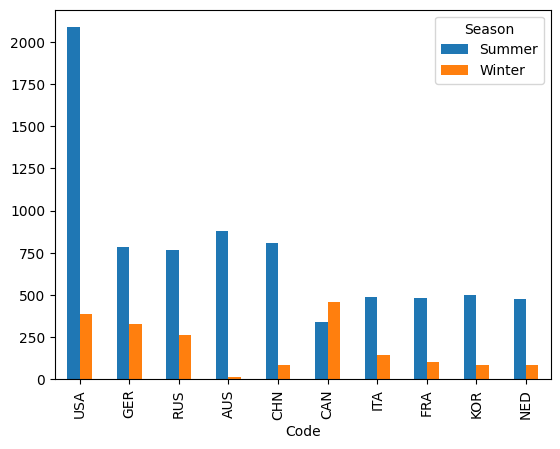

In [68]:
# top_10_season_df['Total'] = top_10_season_df['Summer'] + top_10_season_df['Winter']
top_10_season_df['Total'] = top_10_season_df[["Summer", "Winter"]].sum(axis=1, numeric_only=True)
top_10_season_df.sort_values(by='Total', ascending=False, inplace=True)
top_10_season_df = top_10_season_df[:10]
top_10_season_df[['Summer', 'Winter']].plot(kind="bar");

# DATA VISUALISATION

In [71]:
import matplotlib.pyplot as plt

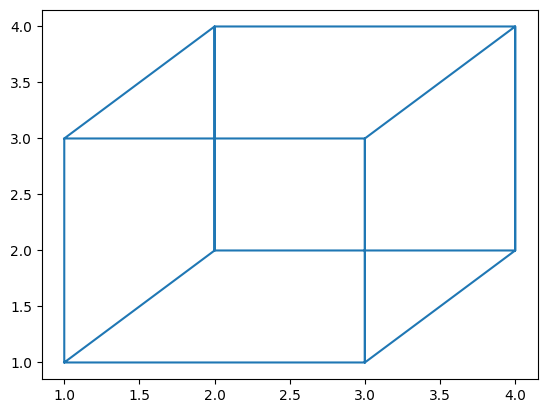

In [73]:
points = [
    {"x": 1, "y": 1},
    {"x": 2, "y": 2},
    {"x": 4, "y": 2},
    {"x": 3, "y": 1},
    {"x": 1, "y": 1},
    {"x": 1, "y": 3},
    {"x": 3, "y": 3},
    {"x": 3, "y": 1},
    {"x": 3, "y": 3},
    {"x": 4, "y": 4},
    {"x": 4, "y": 2},
    {"x": 4, "y": 4},
    {"x": 2, "y": 4},
    {"x": 2, "y": 2},
    {"x": 2, "y": 4},
    {"x": 1, "y": 3},
]
point_df = pd.DataFrame.from_dict(points)
plt.plot(point_df.x, point_df.y);

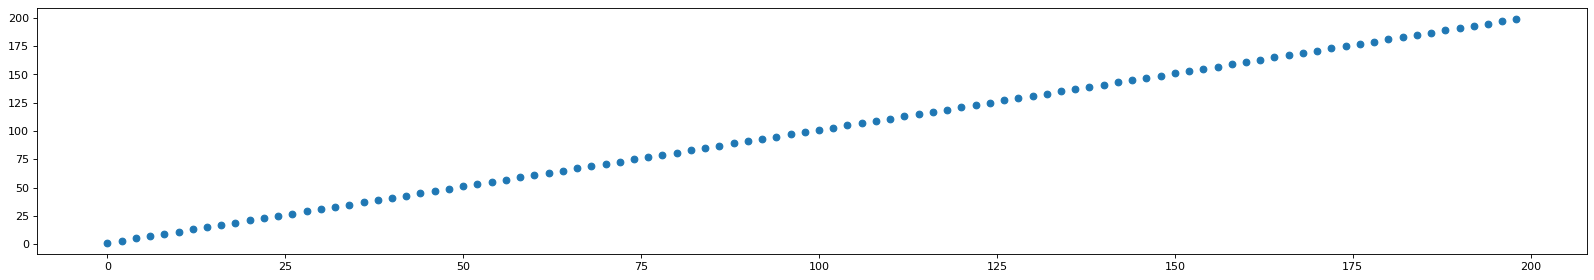

In [74]:
data = np.arange(200)
data.shape=(100,2)
plt.figure(figsize=(25, 4), dpi=80)
plt.scatter(data[:,0], data[:,1]);

(-10.0, 10.0)

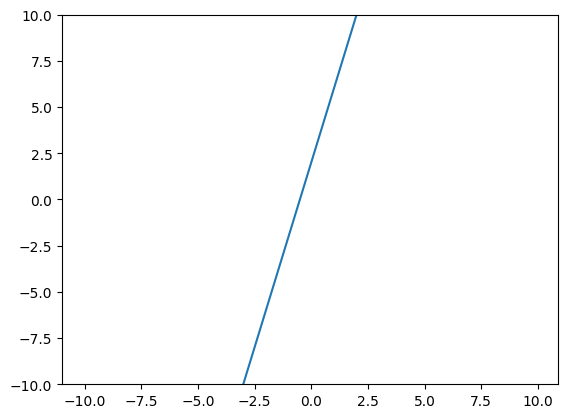

In [4]:
x = np.arange(-10,10,0.1)
y = 4*x + 2
plt.plot(x,y)
plt.ylim(-10,10)

In [5]:
import math
y1 = x*x

def getlog(n):
    if n > 0:   return math.log(n)
    else:       return 0

def gete(n):
    try:        return math.exp(n)
    except:     return 0
    
def getfunc(n):
    try:        return math.exp(n) / (math.exp(n) + 1)
    except:     return 0
    
y2 = list(map(getlog, x))
y3 = list(map(gete,x))
y4 = list(map(getfunc,x))

(-4.0, 4.0)

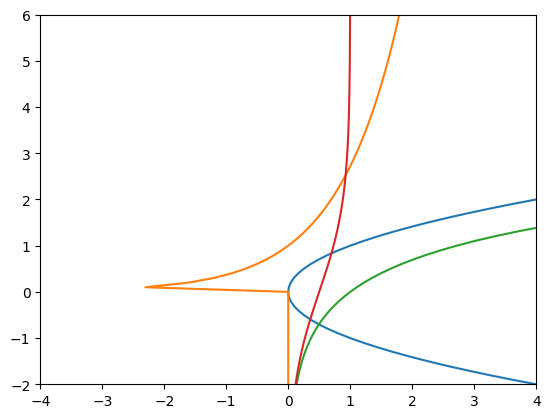

In [6]:
plt.plot(y1,x)
plt.plot(y2,x)
plt.plot(y3,x)
plt.plot(y4,x)
plt.ylim(-2,6)
plt.xlim(-4,4)

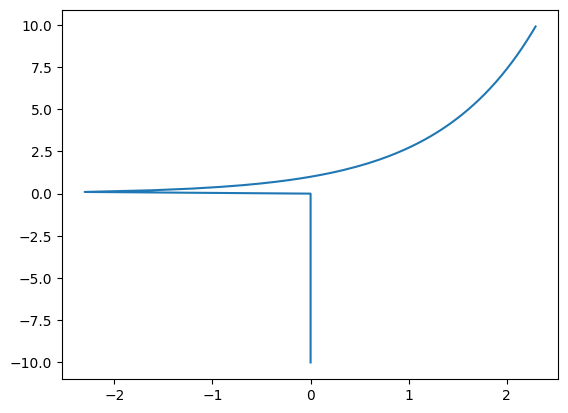

In [7]:
y5 = [getlog(y) if y > 0 else 0 for y in x]
plt.plot(y5,x)